In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [190]:

df = pd.read_csv('datasets\Iris\data.csv')

df.rename( columns = { "sepal length in cm": "sepal_length_in_cm", "sepal width in cm" : "sepal_width_in_cm", "petal length in cm" : "petal_length_in_cm", "petal width in cm" : "petal_width_in_cm"} , inplace = True)
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Convert categorical classes into numerical numbers for correlation anaylsis

In [191]:
newValues = {"Iris-setosa" : 1, "Iris-versicolor" : 2,"Iris-virginica" : 3}
df.replace(newValues, inplace = True)
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [193]:
df["sepal_length_in_cm"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length_in_cm, dtype: float64

In [194]:
df["sepal_width_in_cm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width_in_cm, dtype: float64

In [195]:
df["petal_length_in_cm"].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length_in_cm, dtype: float64

In [196]:
df["petal_width_in_cm"].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width_in_cm, dtype: float64

1    50
2    50
3    50
Name: class, dtype: int64


<AxesSubplot: >

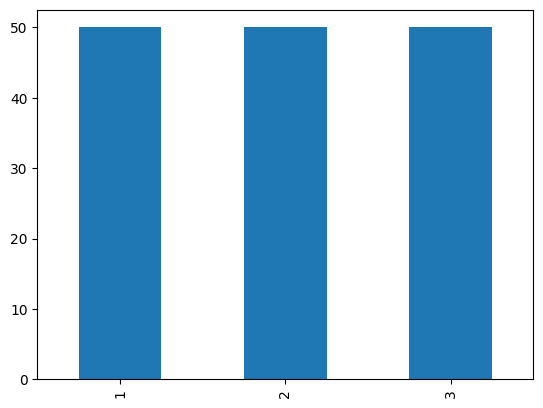

In [197]:
print(df["class"].value_counts())
plotdata = df["class"].value_counts()
plotdata.plot(kind ="bar")

<AxesSubplot: >

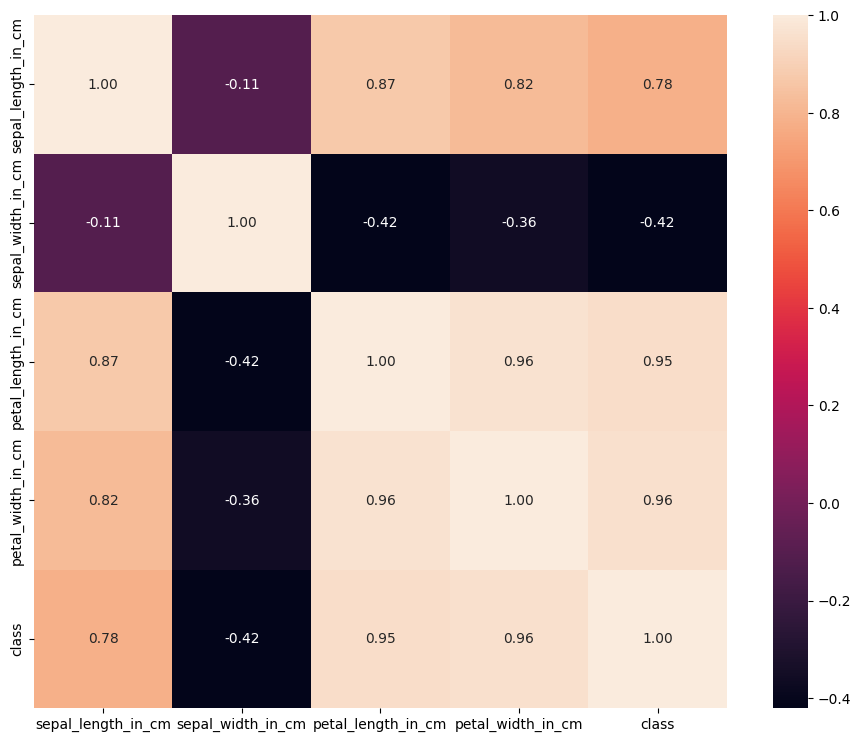

In [198]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax= 1, annot = True, square = True, fmt= ".2f")

To drop data that have negative correlation (<0.00) to the class

In [199]:
def cleanDf(argument):
    df.drop(argument,axis = 1, inplace = True)
    df.dropna()

In [200]:
cleanDf("sepal_width_in_cm")
df

,sepal_length_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1
...,...,...,...,...
145,6.7,5.2,2.3,3
146,6.3,5.0,1.9,3
147,6.5,5.2,2.0,3
148,6.2,5.4,2.3,3


In [201]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('class')
    df['class'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col.replace("_", " "))
    print(record_list)
    return(record_list)

In [202]:
with open("datasets\Iris\cleaned_attributes.txt", "w") as output:
    output.write(str(extract_df_col(df)))

['sepal length in cm', 'petal length in cm', 'petal width in cm', 'class']


# Creating Testing and Training sets

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [204]:
y = df["class"]
x = df.drop("class", axis = 1)

In [205]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (112, 3) (112,)
Test set: 	 (38, 3) (38,)


### Classification Decision Tree Method

In [206]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [207]:
dt_pred = dectree.predict(xTest)
print(dt_pred)

[1 1 3 1 1 2 1 3 3 1 1 1 1 1 2 2 1 2 3 2 3 2 3 2 2 1 1 3 1 3 3 1 2 3 2 1 3
 2]


In [208]:
iris_dt_df = pd.DataFrame(data = dt_pred, columns = ["class"])
iris_dt_df.head(15)

,class
0,1
1,1
2,3
3,1
4,1
5,2
6,1
7,3
8,3
9,1


In [209]:
print("Classification Accuracy \t: ", dectree.score(xTrain,yTrain))

Classification Accuracy 	:  1.0


In [210]:
print("Classification Accuracy \t: ", dectree.score(xTest,yTest))

Classification Accuracy 	:  0.9473684210526315


In [211]:
dtAccuracy = accuracy_score(yTest,dt_pred)
dtFscore = f1_score(yTest,dt_pred, average = "weighted")
print(f"The accuracy of Decision Tree is {dtAccuracy}")
print(f"The F score of Decision Tree is {dtFscore}")

The accuracy of Decision Tree is 0.9473684210526315
The F score of Decision Tree is 0.9473684210526315


In [212]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,dt_pred)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

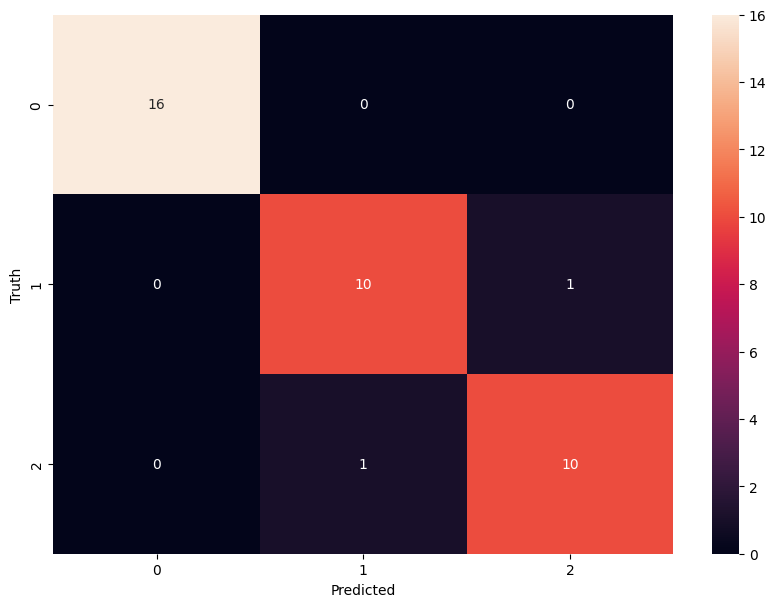

In [213]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [214]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest type", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,sepal_length_in_cm,petal_length_in_cm,petal_width_in_cm,yTest type
0,4.6,1.4,0.3,1
1,4.6,1.5,0.2,1
2,5.7,5.0,2.0,3
3,4.8,1.4,0.1,1
4,4.8,1.9,0.2,1
5,7.2,5.8,1.6,3
6,5.0,1.6,0.2,1
7,6.7,5.8,1.8,3
8,6.4,5.6,2.1,3
9,4.8,1.4,0.3,1


In [215]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", iris_dt_df)
xTestDF.head(20)

,sepal_length_in_cm,petal_length_in_cm,petal_width_in_cm,yTest type,Decision Tree
0,4.6,1.4,0.3,1,1
1,4.6,1.5,0.2,1,1
2,5.7,5.0,2.0,3,3
3,4.8,1.4,0.1,1,1
4,4.8,1.9,0.2,1,1
5,7.2,5.8,1.6,3,2
6,5.0,1.6,0.2,1,1
7,6.7,5.8,1.8,3,3
8,6.4,5.6,2.1,3,3
9,4.8,1.4,0.3,1,1


### Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier


index : 3 
Accuracy : 0.9736842105263158


Text(0, 0.5, 'Testing Accuracy')

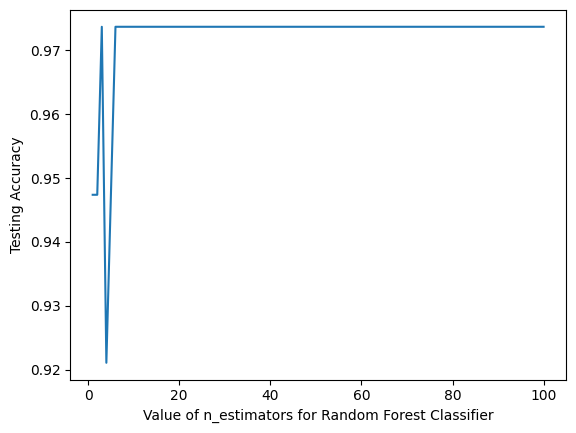

In [217]:
scores =[]
maxAccuracy = 0
maxIndex = 0
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i+1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i+1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [218]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=3)

In [219]:
model.score(xTest,yTest)

0.9210526315789473

In [220]:
rf_pred = model.predict(xTest)

In [221]:
rfAccuracy = accuracy_score(yTest,rf_pred)
rfFscore = f1_score(yTest,rf_pred, average = "weighted")
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.9210526315789473
The F score of Random Forest is 0.9208891794704152


In [222]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,rf_pred)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

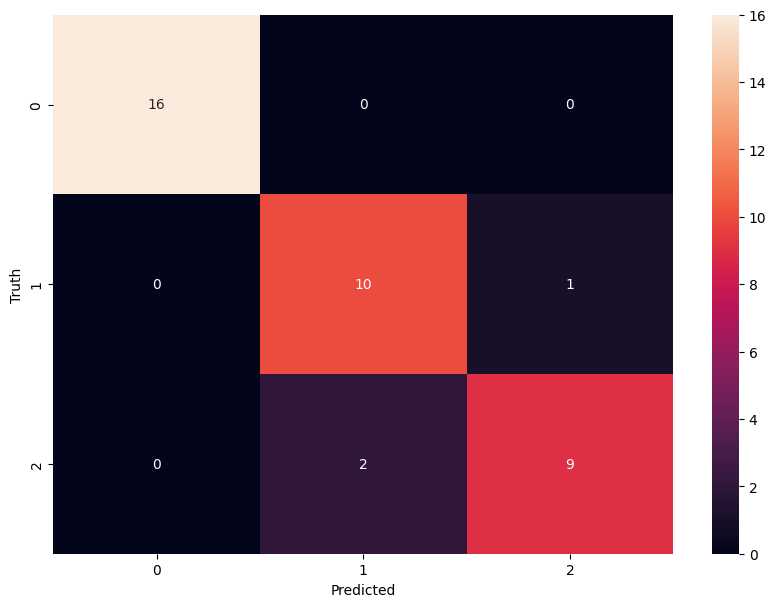

In [223]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [224]:
iris_rf_df = pd.DataFrame(data = rf_pred, columns = ["class"])
iris_rf_df.head(15)

,class
0,1
1,1
2,3
3,1
4,1
5,2
6,1
7,3
8,3
9,1


In [225]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", iris_rf_df)
xTestDF.head(20)

,sepal_length_in_cm,petal_length_in_cm,petal_width_in_cm,yTest type,Decision Tree,Random Forest
0,4.6,1.4,0.3,1,1,1
1,4.6,1.5,0.2,1,1,1
2,5.7,5.0,2.0,3,3,3
3,4.8,1.4,0.1,1,1,1
4,4.8,1.9,0.2,1,1,1
5,7.2,5.8,1.6,3,2,2
6,5.0,1.6,0.2,1,1,1
7,6.7,5.8,1.8,3,3,3
8,6.4,5.6,2.1,3,3,3
9,4.8,1.4,0.3,1,1,1


### K-Nearest-Neighbour Classification

In [226]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    knn_pred= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,knn_pred))
    
maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 1 
Accuracy : 1.0


Text(0, 0.5, 'Testing Accuracy')

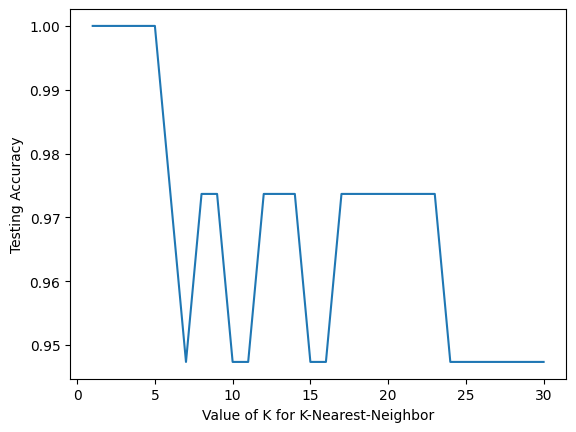

In [227]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

In [228]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=1)

Select maxKValue of nearest neighbour as it is one of the value to achieve high testing accuracy

In [229]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[1 1 3 1 1 3 1 3 3 1 1 1 1 1 2 2 1 2 3 2 2 2 3 2 2 1 1 3 1 3 3 1 2 3 2 1 3
 2]


In [230]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted,average = "weighted")
print(f"The accuracy of K-Nearest-Neighbour is {knnAccuracy}")
print(f"The F score of K-Nearest-Neighbour is {knnFscore}")

The accuracy of K-Nearest-Neighbour is 1.0
The F score of K-Nearest-Neighbour is 1.0


In [231]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

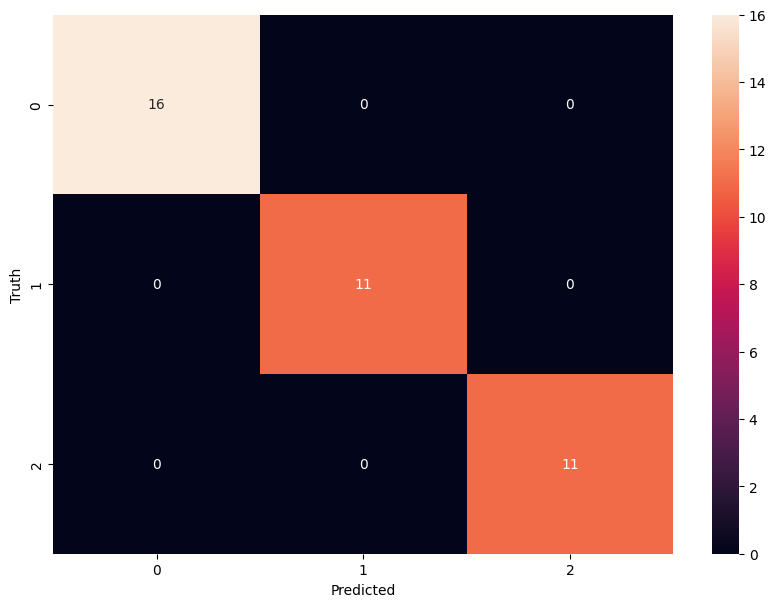

In [232]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [233]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["class"])
knnPredictedDF.head(10)

,class
0,1
1,1
2,3
3,1
4,1
5,3
6,1
7,3
8,3
9,1


In [234]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,sepal_length_in_cm,petal_length_in_cm,petal_width_in_cm,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors
0,4.6,1.4,0.3,1,1,1,1
1,4.6,1.5,0.2,1,1,1,1
2,5.7,5.0,2.0,3,3,3,3
3,4.8,1.4,0.1,1,1,1,1
4,4.8,1.9,0.2,1,1,1,1
5,7.2,5.8,1.6,3,2,2,3
6,5.0,1.6,0.2,1,1,1,1
7,6.7,5.8,1.8,3,3,3,3
8,6.4,5.6,2.1,3,3,3,3
9,4.8,1.4,0.3,1,1,1,1


### Support Vector Machines

In [235]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [236]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[1 1 3 1 1 3 1 3 3 1 1 1 1 1 2 2 1 2 3 2 3 2 3 2 2 1 1 3 1 3 2 1 2 3 2 1 3
 2]


In [237]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.9473684210526315
The F score of Support Vector Machines is 0.9473684210526315


In [238]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

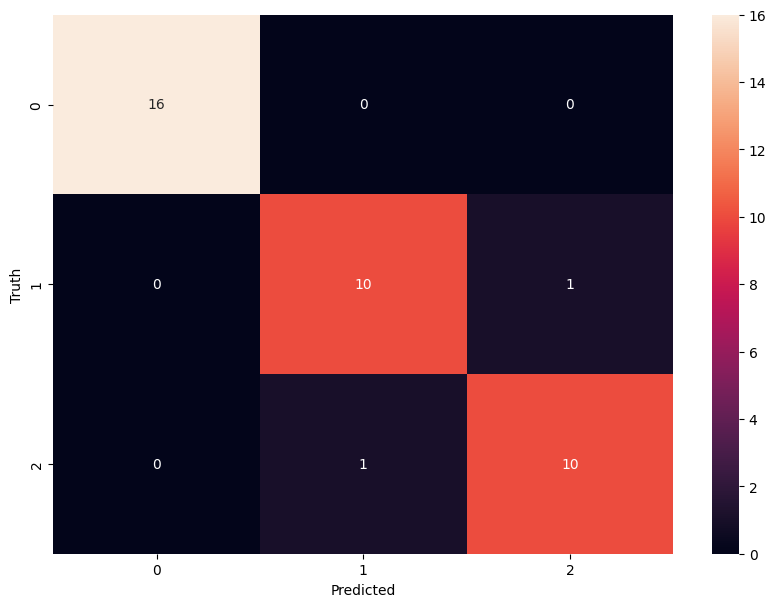

In [239]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [240]:
iris_svm_df = pd.DataFrame(data = svm_pred, columns = ["class"])
iris_svm_df.head(15)

,class
0,1
1,1
2,3
3,1
4,1
5,3
6,1
7,3
8,3
9,1


In [241]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", iris_svm_df)
xTestDF.head(20)

,sepal_length_in_cm,petal_length_in_cm,petal_width_in_cm,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,4.6,1.4,0.3,1,1,1,1,1
1,4.6,1.5,0.2,1,1,1,1,1
2,5.7,5.0,2.0,3,3,3,3,3
3,4.8,1.4,0.1,1,1,1,1,1
4,4.8,1.9,0.2,1,1,1,1,1
5,7.2,5.8,1.6,3,2,2,3,3
6,5.0,1.6,0.2,1,1,1,1,1
7,6.7,5.8,1.8,3,3,3,3,3
8,6.4,5.6,2.1,3,3,3,3,3
9,4.8,1.4,0.3,1,1,1,1,1


### Neural Network

In [242]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(8,), random_state=1, max_iter = 1000)
clf.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [243]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[1 1 3 1 1 3 1 3 3 1 1 1 1 1 2 2 1 2 3 2 2 2 3 2 2 1 1 3 1 3 3 1 2 3 2 1 3
 2]


In [244]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 1.0
The F score of Neural Network is 1.0


In [245]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

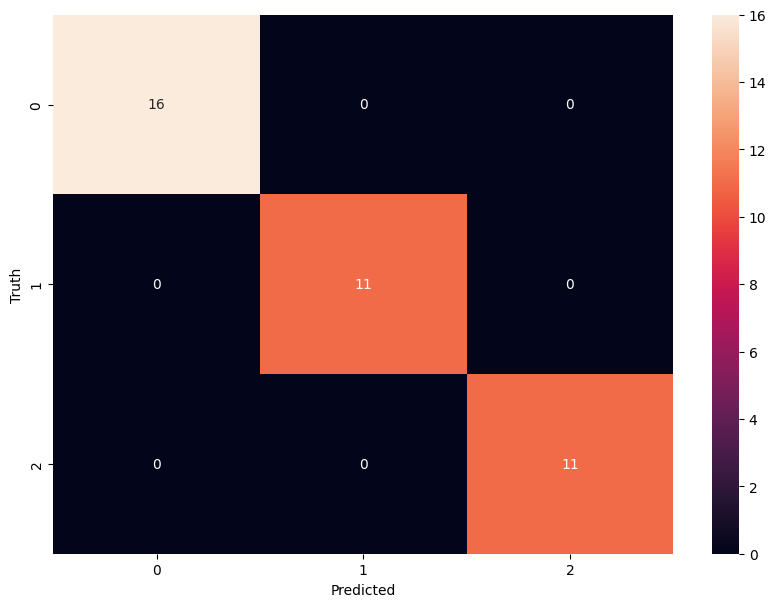

In [246]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [247]:
iris_nn_df = pd.DataFrame(data = nn_pred, columns = ["class"])
iris_nn_df.head(15)

,class
0,1
1,1
2,3
3,1
4,1
5,3
6,1
7,3
8,3
9,1


# Evaluation Metrics of Machine Learning Algorithms

In [248]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore], 
                   "SVM" : [svmAccuracy,svmFscore],
                   "NN" : [nnAccuracy,nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree", "SVM", "NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,1.0,0.921053,0.947368,0.947368,1.0
Fscore,1.0,0.920889,0.947368,0.947368,1.0
